In [9]:
from Cryptodome.Cipher import AES
from Cryptodome.Random import get_random_bytes
key = b'0123456701234567'
cipher = AES.new(key, AES.MODE_ECB)

In [10]:
plaintextA = b'this is a secret'
ciphertext = cipher.encrypt(plaintextA)
plaintextB = cipher.decrypt(ciphertext)
print(plaintextA)
print(ciphertext)
print(plaintextB)

b'this is a secret'
b'\x8dk\x84\xcey*h\xach\x9b\xd0[\xb6pR\x95'
b'this is a secret'


In [11]:
a = 0b111111111111111111111111111111
b = 0b111111110111011111111111111111
diff = a^b
diff.bit_length()

22

## MCS Pi

In [13]:
import random
import math 
import matplotlib.pyplot as plt

random.seed(10)
coords = []
radius = 1

err = []
a = list(range(1000, 100000, 1000))
for j in a: 
    inside = 0
    total = 0
    for i in range(j):
        coord = random.random(), random.random()
        eq = coord[0]**2 + coord[1]**2 - radius**2
        if eq < 0 or eq == 0: 
            inside += 1
            total += 1
        else: 
            total += 1
    
        coords.append(coord)
    pi = inside/total*4
    err.append(abs(pi-math.pi))

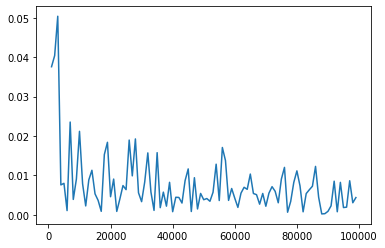

In [14]:
plt.plot(a, err)

## MCS AES

In [25]:
from lfsr import LFSR, int_to_bin, bin_to_int, berlekamp_massey, print_poly
import random

class PseudoRandomByteGenerator():

    def __init__(self, seed=None, bit_generator=None, **kwargs):
        if bit_generator == None: 
            self.bits = []
            self.generator = LFSR(kwargs['poly'], seed)
        else: 
            self.generator = bit_generator(**kwargs)
    
    def __iter__(self):
        return self
    
    def __next__(self):
        self.bits = [byte for byte in islice(self.generator, 8)]
        byte = bin_to_int(self.bits)
        return byte

In [38]:
from itertools import islice

def plain_textgen(n=16):
    prbg = PseudoRandomByteGenerator(poly=[3,1,0]) #iterator
    plaintext1 = [byte for byte in islice(prbg, n)]
    first_value = random.randint(0,n-1)
    plain_value = random.randint(0,7)
    change = toggleKthBit(plaintext1[first_value], plain_value)
    plaintext2 = plaintext1.copy()
    plaintext2[first_value] = change
    plaintext1, plaintext2 = bytes(plaintext1), bytes(plaintext2)
    return plaintext1, plaintext2

In [39]:
def key_gen(n):
    key1 = list(get_random_bytes(n))
    first_value = random.randint(0,n-1)
    plain_value = random.randint(0,7)
    change = toggleKthBit(key1[first_value], plain_value)
    key2 = key1.copy()
    plaintext2[first_value] = change
    key1, key2 = bytes(key1), bytes(key2)
    return key1, key2

In [40]:
def toggleKthBit(n, k):
    return (n ^ (1 << (k)))

In [41]:
def msc_conf(key_length=16):
    distance = 0
    key1, key2 = key_gen(key_length)
    cipher = AES.new(key1, AES.MODE_CTR)
    plaintextA, plaintextB = plain_textgen(n=16)
    ciphertextA = list(cipher.encrypt(plaintextA))
    cipher = AES.new(key2, AES.MODE_CTR)
    ciphertextB = list(cipher.encrypt(plaintextB))
    for cipher1, cipher2 in zip(ciphertextA, ciphertextB):
        distance += bin(cipher1^cipher2).count("1")
    return distance

In [42]:
def msc_diff(key_length=16):
    distance = 0
    key = get_random_bytes(key_length)
    cipher = AES.new(key, AES.MODE_CTR)
    plaintextA, plaintextB = plain_textgen(n=16)
    ciphertextA = list(cipher.encrypt(plaintextA))
    ciphertextB = list(cipher.encrypt(plaintextB))
    for cipher1, cipher2 in zip(ciphertextA, ciphertextB):
        distance += bin(cipher1^cipher2).count("1")
    return distance

In [43]:
dist = []
for i in range(1000):
    dist.append(msc_diff(16))

ValueError: invalid literal for int() with base 2: 'TrueTrueTrueFalseTrueFalseFalseTrue'

In [ ]:
plt.hist(dist)